Look at the function "load_train_test_imdb_data" and try to understand what is it doing.

In [1]:
import os
import numpy as np
import pandas as pd


def load_train_test_imdb_data(data_dir):
    """Loads the IMDB train/test datasets from a folder path.
    Input:
    data_dir: path to the "aclImdb" folder.
    
    Returns:
    train/test datasets as pandas dataframes.
    """

    data = {}
    for split in ["train", "test"]:
        data[split] = []
        for sentiment in ["neg", "pos"]:
            score = 1 if sentiment == "pos" else 0

            path = os.path.join(data_dir, split, sentiment)
            file_names = os.listdir(path)
            for f_name in file_names:
                with open(os.path.join(path, f_name), "r") as f:
                    review = f.read()
                    data[split].append([review, score])

    np.random.shuffle(data["train"])        
    data["train"] = pd.DataFrame(data["train"],
                                 columns=['text', 'sentiment'])

    np.random.shuffle(data["test"])
    data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment'])

    return data["train"], data["test"]




Use the function "load_train_test_imdb_data" to load the data. Use the variable names "train_data" and "test_data". 
To load the data, you have to indicate the path to the data folder. If you are using the jupiter server, use the path "/mnt/nvs3/nlp-public/aclImdb/". If you are using jupiter notebook on your own computer, download the data from http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz and extract it (you can use the command "tar -zxvf aclImdb_v1.tar.gz" on a Unix system)

In [2]:
#save the train and test data in train_data and test_data
train_data, test_data = load_train_test_imdb_data(
    data_dir="/mnt/nvs3/nlp-public/aclImdb/")

Print the first 5 rows of the train data.

In [3]:
#print first 5 rows of train data
print(train_data[:5])

                                                text  sentiment
0  It's hard to say anything about a movie like t...          1
1  THE RINGMASTER stars Jerry Springer as a TV ta...          0
2  Chris, an adopted son of a moral family, a los...          0
3  This PM Entertainment production is laced with...          1
4  Kirk and crew land on a lonely planet where th...          1


Print the first 5 rows of the test data.

In [4]:
#print first 5 elements of test data
print(test_data.head(5))

                                                text  sentiment
0  Without actually giving away my age, I saw thi...          0
1  The last of the sequels,not counting Abbott an...          1
2  I never expected such an old film to be as imp...          1
3  VHS - I have watched this over and over and LO...          1
4  What we have here the standard Disney direct t...          0


Print the information about the train_data dataframe. You can use the function "info".

In [5]:
#print info for dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
text         25000 non-null object
sentiment    25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


Transform each text into a vector of word counts. Use the class "CountVectorizer". To create the training features use the method "fit_transform()". To create the test features use the method "transform()".

In [6]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Transform each text into a vector of word counts
vectorizer = CountVectorizer(stop_words="english")

training_features = vectorizer.fit_transform(train_data["text"])    
test_features = vectorizer.transform(test_data["text"])

Print the features' names. To do that use the method "get_feature_names()" from "CountVectorizer".

In [7]:
print(vectorizer.get_feature_names())

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m', '100min', '100mph', '100s', '100th', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '1050', '105lbs', '106', '106min', '107', '108', '109', '10am', '10lines', '10mil', '10min', '10minutes', '10p', '10pm', '10s', '10star', '10th', '10x', '10yr', '11', '110', '1100', '11001001', '1100ad', '111', '112', '1138', '114', '1146', '115', '116', '117', '11f', '11m', '11th', '12', '120', '1200', '1200f', '1201', '1202', '123', '12383499143743701', '125', '125m', '127', '128', '12a', '12hr', '12m', '12mm', '12s', '12th', '13', '130', '1300', '1300s', '131', 

Print the dimentions of the training and the test data features. Use the property "shape". 

In [8]:
#print training data dimensions
training_features.shape

(25000, 74538)

In [9]:
#print test data dimensions
test_features.shape

(25000, 74538)

Train a SVM model using the class "LinearSVC". Use the "fit()" function to train the model. It takes as parameters the training_features, and the annotation form the training data. Make prediction with the trained model using the "predict()" function. The function takes as an input the test_features. 

In [10]:
from sklearn.svm import LinearSVC

# Training with linear SVM
model = LinearSVC()
model.fit(training_features, train_data["sentiment"])
y_pred = model.predict(test_features)

/opt/jupyterhub-venv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Calculate the persformance of the model: confusion matrix, using the function "confusion_matrix()"; accuracy, using the function "accuracy_score()"; precision, using the function "precision_score"; recall, using the function "recall_score"; and F1 score, using the function "f1_score". Use the function "classification_report()" to calculate all metrics. Print the results. 

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#Calculate performance
conf = confusion_matrix(test_data["sentiment"], y_pred) #confusion matrix

print("Confusion matrix on the IMDB dataset:")
print(conf)

acc = accuracy_score(test_data["sentiment"], y_pred) #accuracy

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

prec = precision_score(test_data["sentiment"], y_pred) #precision

print("Precision on the IMDB dataset: {:.2f}".format(prec*100))

rec = recall_score(test_data["sentiment"], y_pred) #recall

print("Recall on the IMDB dataset: {:.2f}".format(rec*100))

f1 = f1_score(test_data["sentiment"], y_pred) #recall

print("F1 on the IMDB dataset: {:.2f}".format(f1*100))

rep = classification_report(test_data["sentiment"], y_pred) #generates a report for precision, recall, f1-score and support

print(rep)


Confusion matrix on the IMDB dataset:
[[10558  1942]
 [ 2188 10312]]
Accuracy on the IMDB dataset: 83.48
Precision on the IMDB dataset: 84.15
Recall on the IMDB dataset: 82.50
F1 on the IMDB dataset: 83.32
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



Train a decision tree model using the class "DecisionTreeClassifier". Use the "fit()" function to train the model. It takes as parameters the training_features, and the annotation form the training data. Make prediction with the trained model using the "predict()" function. The function takes as an input the test_features. Print the maximum depth of the tree. To do that use the property "tree_.max_depth".

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Training with decision tree
model = DecisionTreeClassifier()
model.fit(training_features, train_data["sentiment"])
y_predDT = model.predict(test_features)

print(model.tree_.max_depth) #236

222


Similar to the SVM, print the performance metrics for the DT.

In [13]:
#Calculate performance
conf = confusion_matrix(test_data["sentiment"], y_predDT) #accuracy

print("Confusion matrix on the IMDB dataset:")
print(conf)

acc = accuracy_score(test_data["sentiment"], y_predDT) #accuracy

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

prec = precision_score(test_data["sentiment"], y_predDT) #precision

print("Precision on the IMDB dataset: {:.2f}".format(prec*100))

rec = recall_score(test_data["sentiment"], y_predDT) #recall

print("Recall on the IMDB dataset: {:.2f}".format(rec*100))

f1 = f1_score(test_data["sentiment"], y_predDT) #recall

print("F1 on the IMDB dataset: {:.2f}".format(f1*100))

rep = classification_report(test_data["sentiment"], y_predDT) #generates a report for precision, recall, f1-score and support

print(rep)

Confusion matrix on the IMDB dataset:
[[9026 3474]
 [3450 9050]]
Accuracy on the IMDB dataset: 72.30
Precision on the IMDB dataset: 72.26
Recall on the IMDB dataset: 72.40
F1 on the IMDB dataset: 72.33
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     12500
           1       0.72      0.72      0.72     12500

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000



Retrain the decision tree model by limiting the maximum tree depth to 10. You can do that by using the attribute "max_depth" in "DecisionTreeClassifier".

In [14]:
# Training with decision tree with max depth
model = DecisionTreeClassifier(max_depth=10)
model.fit(training_features, train_data["sentiment"])
y_predDT = model.predict(test_features)

Once again, calculate the performance metrics and print them.

In [15]:
#Calculate performance
conf = confusion_matrix(test_data["sentiment"], y_predDT) #accuracy

print("Confusion matrix on the IMDB dataset:")
print(conf)

acc = accuracy_score(test_data["sentiment"], y_predDT) #accuracy

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

prec = precision_score(test_data["sentiment"], y_predDT) #precision

print("Precision on the IMDB dataset: {:.2f}".format(prec*100))

rec = recall_score(test_data["sentiment"], y_predDT) #recall

print("Recall on the IMDB dataset: {:.2f}".format(rec*100))

f1 = f1_score(test_data["sentiment"], y_predDT) #recall

print("F1 on the IMDB dataset: {:.2f}".format(f1*100))

rep = classification_report(test_data["sentiment"], y_predDT) #generates a report for precision, recall, f1-score and support

print(rep)

Confusion matrix on the IMDB dataset:
[[ 6945  5555]
 [ 1525 10975]]
Accuracy on the IMDB dataset: 71.68
Precision on the IMDB dataset: 66.39
Recall on the IMDB dataset: 87.80
F1 on the IMDB dataset: 75.61
              precision    recall  f1-score   support

           0       0.82      0.56      0.66     12500
           1       0.66      0.88      0.76     12500

    accuracy                           0.72     25000
   macro avg       0.74      0.72      0.71     25000
weighted avg       0.74      0.72      0.71     25000



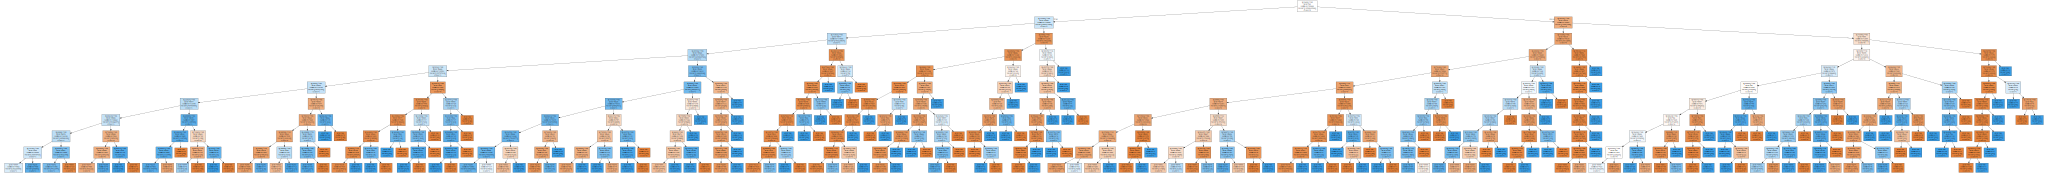

In [16]:
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from IPython.display import display

#display DT tree
graph = Source(tree.export_graphviz(model, out_file=None
   , class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))